In [1]:
import numpy as np

import matplotlib.pyplot as plt

import ai_prentice_wasserstein
import utils

In [2]:
name = "kdv"
kdv_data = np.load("trajectories/kdv.npz")
data = kdv_data["data"]
kdv_dmat = np.load("kdv_dist_matrix.npz")["dist_mat"]

In [3]:
ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice()

In [4]:
ai_prentice.fit(data, kdv_dmat)

Normalizing
Embedding data and computing scores
Computing the dimensionality


In [5]:
embedding = ai_prentice.embeddings[3]
params = kdv_data["params"]

In [11]:
plt.rcParams.update({'font.size': 18})

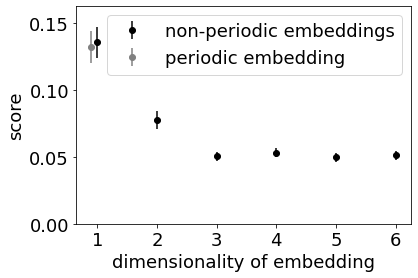

In [12]:
utils.plot_scores(plt.gca(), ai_prentice.scores, ai_prentice.errors)
# plt.savefig(f"graphs/{name}_scores.pdf")
plt.show()

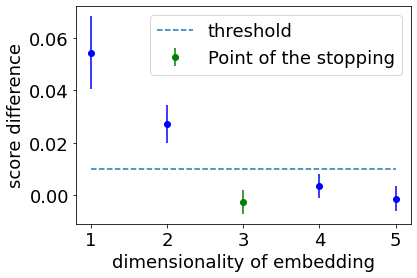

In [13]:
utils.plot_score_diffs(plt.gca(), ai_prentice.scores, ai_prentice.errors, ai_prentice.dimensionality, ai_prentice.threshold)
# plt.savefig(f"graphs/{name}_diffs.pdf")
plt.show()

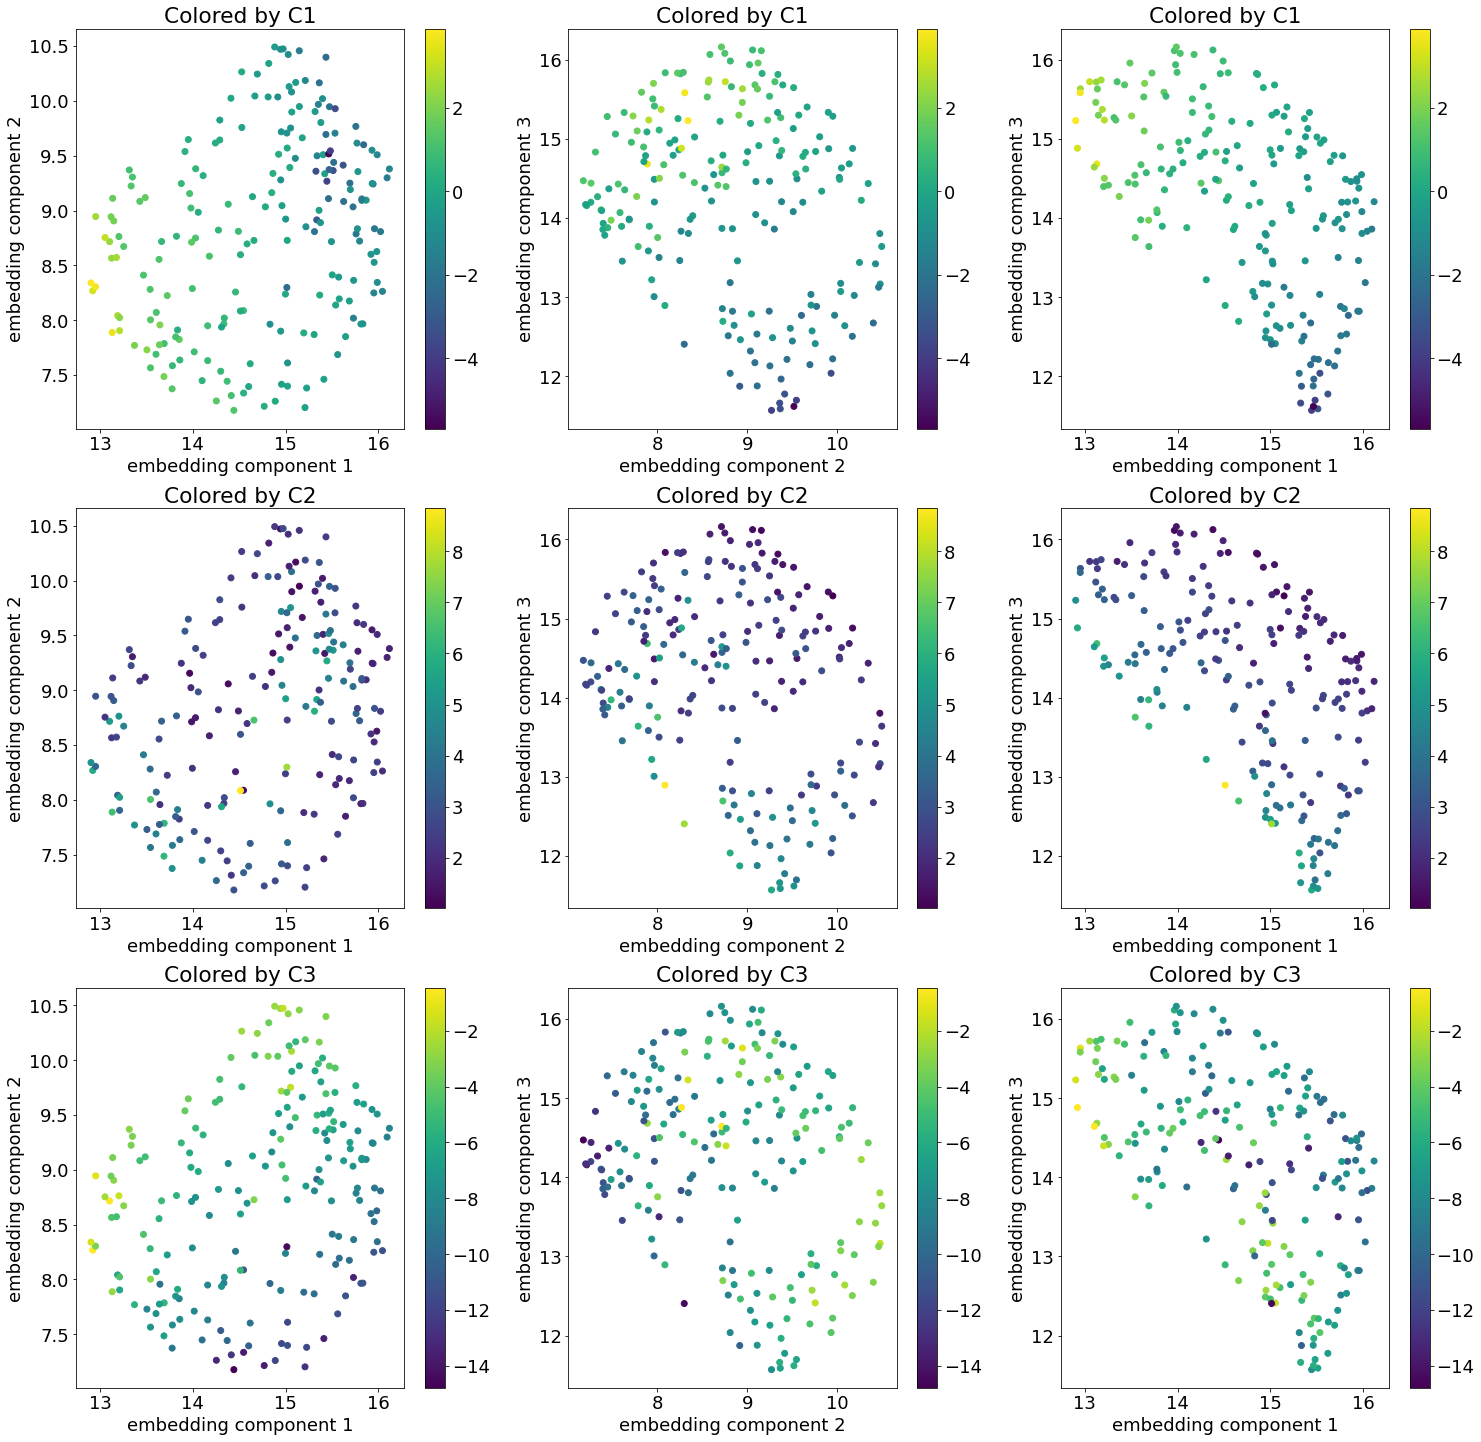

In [14]:
quantities = ["C1", "C2", "C3"]
utils.plot_all_3d(*plt.subplots(3, 3, figsize=(25, 25)), embedding, params, quantities)
plt.show()

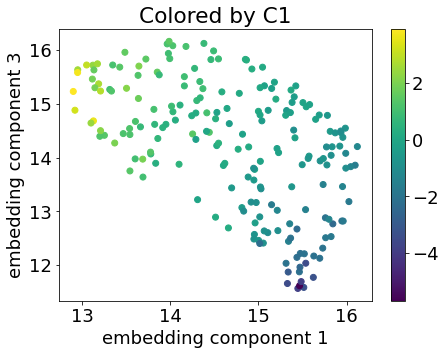

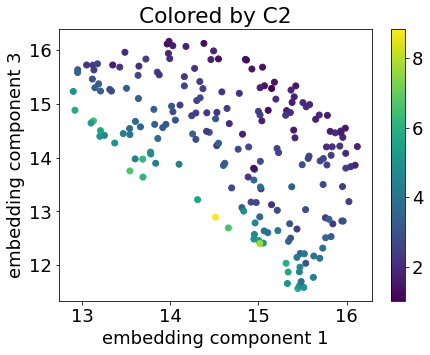

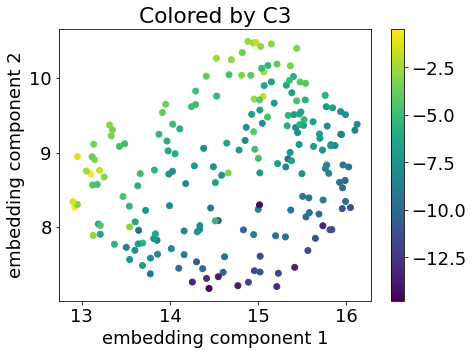

In [15]:
for (i, j), quantity, quantity_name in zip(utils.choose_coordinates(embedding, params), params.T, quantities):
    utils.plot_2d(*plt.subplots(figsize=(7, 5)), embedding[:, [i, j]], quantity, quantity_name, i + 1, j + 1)
    # plt.savefig(f"graphs/{name}_{quantity_name}.pdf")
    plt.show()